In [9]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import my_parser

In [10]:
import matplotlib.pyplot as plt

In [11]:
data = my_parser.get_all()

In [12]:
label_map = {'Reject': 0, 'Accept': 1}
binary_labels = [label_map[item['label']['label']] for item in data]

print(binary_labels)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

(array([4992.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

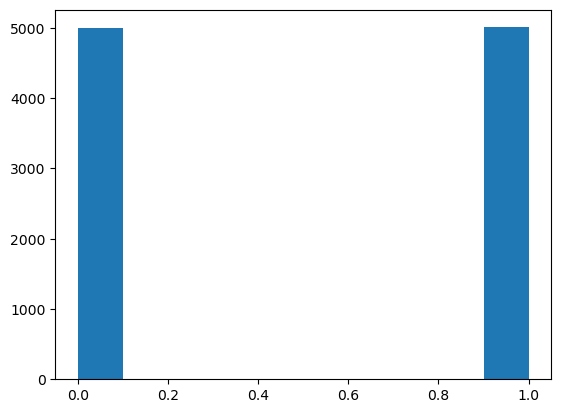

In [13]:
plt.hist(binary_labels)

In [6]:
data[0]['passport']['first_name'] == data[0]['account_form']['first_name']

True

In [15]:
label_map = {'Reject': 0, 'Accept': 1}

# Define fields to check across sources (without '.json')
fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

# Track stats for each field
field_stats = {field: {'match': 0, 'total': 0} for field in fields_to_check}

# Loop through entries
for entry in data:
    if label_map.get(entry.get('label', {}).get('label')) == 1:
        continue  # Skip if not 'Accept'

    for field, sources in fields_to_check.items():
        values = []
        for src in sources:
            val = entry.get(src, {}).get(field)
            values.append(val)

        # Count only if we have at least 2 non-None values to compare
        non_none_values = [v for v in values if v is not None]
        if len(non_none_values) >= 2:
            if all(v == non_none_values[0] for v in non_none_values):
                field_stats[field]['match'] += 1
            field_stats[field]['total'] += 1

# Print the result
print("📊 Consistency report for 'Accept' entries:\n")
for field, stat in field_stats.items():
    total = stat['total']
    match = stat['match']
    if total > 0:
        percent = 100 * match / total
        print(f"✅ {field:20}: {percent:.2f}% consistent ({match}/{total})")
    else:
        print(f"⚠️  {field:20}: No valid comparisons")


📊 Consistency report for 'Accept' entries:

✅ first_name          : 93.65% consistent (4675/4992)
✅ middle_name         : 97.64% consistent (4874/4992)
✅ last_name           : 91.81% consistent (4583/4992)
✅ passport_number     : 97.24% consistent (4854/4992)
✅ birth_date          : 94.67% consistent (4726/4992)
✅ gender              : 98.48% consistent (4916/4992)
✅ nationality         : 95.89% consistent (4787/4992)
✅ passport_issue_date : 95.93% consistent (4789/4992)
✅ passport_expiry_date: 94.89% consistent (4737/4992)
✅ country_of_domicile : 97.12% consistent (4848/4992)
✅ email_address       : 96.51% consistent (4818/4992)
✅ phone_number        : 83.85% consistent (4186/4992)
✅ currency            : 98.60% consistent (4922/4992)
✅ address             : 94.71% consistent (4728/4992)


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

true_labels = []
predicted_labels = []

for entry in data:
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    # Check consistency across fields
    all_consistent = True
    for field, sources in fields_to_check.items():
        values = []
        for src in sources:
            val = entry.get(src, {}).get(field)
            values.append(val)
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.50      0.67      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.75     10000
   macro avg       0.83      0.75      0.73     10000
weighted avg       0.83      0.75      0.73     10000

🧮 Confusion Matrix:
[[2506 2486]
 [   0 5008]]


In [17]:
# Identify false positives
false_positives = [
    idx for idx, (true, pred) in enumerate(zip(true_labels, predicted_labels))
    if true == 0 and pred == 1
]

print("\n❌ False Positive Indices:")
print(false_positives)



❌ False Positive Indices:
[4, 5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 220, 222, 228, 236, 245, 246, 248, 249, 250, 251, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 442, 447, 458, 459, 466, 479, 489, 491, 504, 506, 509, 513, 514, 519, 520, 521, 532, 534, 535, 536, 541, 547, 548, 555, 557, 559, 564, 571, 572, 578, 580, 585, 589, 590, 598, 600, 604, 610, 633, 634, 635, 636, 640, 645, 646, 651, 653, 655, 656, 660, 667, 672, 673, 677, 678, 679, 681, 683, 689, 690, 694, 697, 706, 708, 712, 713, 717, 721, 723, 728, 729, 731, 734, 749, 753, 758, 767, 770, 775, 776, 777, 778, 782, 785,

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # Additional check: is MRZ passport number consistent?
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    # Compare MRZ passport number to actual stated numbers
    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # Predict based on consistency
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.51      0.68      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.76     10000
   macro avg       0.84      0.75      0.74     10000
weighted avg       0.84      0.76      0.74     10000

🧮 Confusion Matrix:
[[2545 2447]
 [   0 5008]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 222, 228, 236, 245, 246, 248, 249, 250, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 

In [112]:
for idx in false_positives:
    entry = data[idx]
    client_info = entry.get('client_profile')

    if not isinstance(client_info, dict):
        continue

    country = client_info.get('country_of_domicile')

    if isinstance(country, str) and ',' in country:
        print(f"Index {idx} | MULTIPLE: {country}")


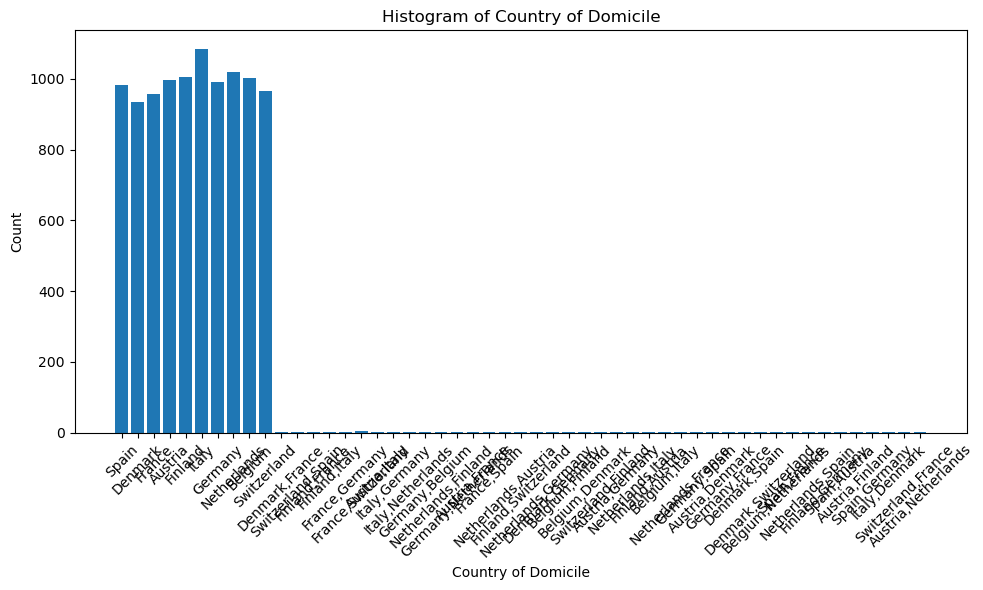

In [113]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract country_of_domicile values
countries = [entry.get('client_profile', {}).get('country_of_domicile') for entry in data]
countries = [c for c in countries if c is not None]

# Count occurrences
country_counts = Counter(countries)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(country_counts.keys(), country_counts.values())
plt.xlabel("Country of Domicile")
plt.ylabel("Count")
plt.title("Histogram of Country of Domicile")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

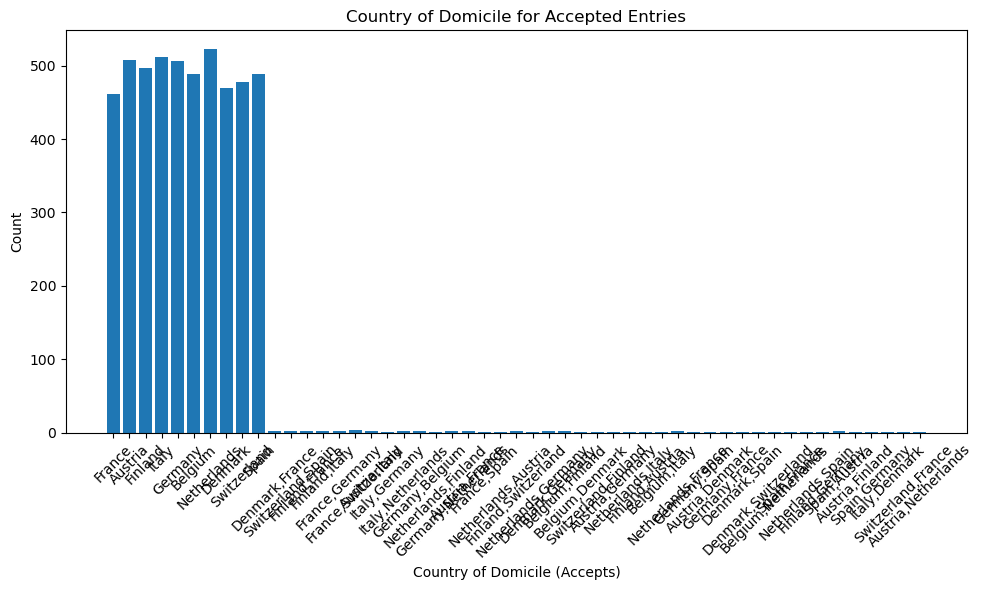

In [114]:
from collections import Counter
import matplotlib.pyplot as plt

# Filter to Accepts
accept_entries = [entry for entry in data if entry.get('label', {}).get('label') == 'Reject']

# Extract country_of_domicile
countries = [entry.get('client_profile', {}).get('country_of_domicile') for entry in accept_entries]
countries = [c for c in countries if c is not None]

# Count and plot
country_counts = Counter(countries)
plt.figure(figsize=(10, 6))
plt.bar(country_counts.keys(), country_counts.values())
plt.xlabel("Country of Domicile (Accepts)")
plt.ylabel("Count")
plt.title("Country of Domicile for Accepted Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
set(countries)

{'Austria',
 'Austria,Denmark',
 'Austria,Finland',
 'Austria,France',
 'Austria,Germany',
 'Austria,Italy',
 'Austria,Netherlands',
 'Belgium',
 'Belgium,Denmark',
 'Belgium,Finland',
 'Belgium,Italy',
 'Belgium,Netherlands',
 'Denmark',
 'Denmark,France',
 'Denmark,Germany',
 'Denmark,Spain',
 'Denmark,Switzerland',
 'Finland',
 'Finland,Austria',
 'Finland,France',
 'Finland,Germany',
 'Finland,Italy',
 'Finland,Switzerland',
 'France',
 'France,Germany',
 'France,Spain',
 'France,Switzerland',
 'Germany',
 'Germany,Belgium',
 'Germany,France',
 'Germany,Netherlands',
 'Germany,Spain',
 'Italy',
 'Italy,Denmark',
 'Italy,Germany',
 'Italy,Netherlands',
 'Netherlands',
 'Netherlands,Austria',
 'Netherlands,Finland',
 'Netherlands,France',
 'Netherlands,Germany',
 'Netherlands,Italy',
 'Netherlands,Spain',
 'Spain',
 'Spain,Austria',
 'Spain,France',
 'Spain,Germany',
 'Switzerland',
 'Switzerland,Finland',
 'Switzerland,France',
 'Switzerland,Spain'}

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # Additional check: is MRZ passport number consistent?
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    # Compare MRZ passport number to actual stated numbers
    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # Predict based on consistency
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.51      0.68      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.76     10000
   macro avg       0.84      0.75      0.74     10000
weighted avg       0.84      0.76      0.74     10000

🧮 Confusion Matrix:
[[2545 2447]
 [   0 5008]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 222, 228, 236, 245, 246, 248, 249, 250, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # Additional check: is MRZ passport number consistent?
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # ✅ New check: country_of_domicile should not contain multiple values
    domicile = entry.get('client_profile', {}).get('country_of_domicile')
    if domicile and len(domicile.split(',')) > 1:
        all_consistent = False

    # Predict based on consistency
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.51      0.68      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.76     10000
   macro avg       0.84      0.75      0.74     10000
weighted avg       0.84      0.76      0.74     10000

🧮 Confusion Matrix:
[[2545 2447]
 [   0 5008]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 222, 228, 236, 245, 246, 248, 249, 250, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 

In [494]:
true_data = []


for i in range(len(data)):
    if data[i]['label']['label'] == 'Accept':
        true_data.append(i)

In [493]:
data[false_positives[14]]

{'passport': {'first_name': 'Diana',
  'middle_name': 'Lina',
  'last_name': 'Hoffmann',
  'gender': 'F',
  'country': 'Germany',
  'country_code': 'DEU',
  'nationality': 'German',
  'birth_date': '1965-10-18',
  'passport_number': 'UC2797179',
  'passport_mrz': ['P<DEUHOFFMANN<<DIANA<LINA<<<<<<<<<<<<<<<<<<<<',
   'UC2797179DEU651018<<<<<<<<<<<<<<<<<<<<<<<<<<<'],
  'passport_issue_date': '2023-07-30',
  'passport_expiry_date': '2033-07-29'},
 'client_profile': {'name': 'Diana Lina Hoffmann',
  'address': {'city': 'Gelsenkirchen',
   'street name': 'Augustusplatz',
   'street number': 27,
   'postal code': '37553'},
  'country_of_domicile': 'Germany',
  'birth_date': '1965-10-18',
  'nationality': 'German',
  'passport_number': 'UC2797179',
  'passport_issue_date': '2023-07-30',
  'passport_expiry_date': '2033-07-29',
  'gender': 'F',
  'phone_number': '+49 7116 794690',
  'email_address': 'diana.hoffmann@freenet.de',
  'marital_status': 'single',
  'secondary_school': {'name': 'Heinri

In [276]:
from datetime import datetime

def correct_labels(data_list):
    fixed_today = datetime(2025, 4, 1)
    
    for entry in data_list:
        expiry_date_str = entry['passport']['passport_expiry_date']
        expiry_date = datetime.strptime(expiry_date_str, "%Y-%m-%d")
        
        is_expired = expiry_date < fixed_today
        current_label = entry['label']['label']
        
        if is_expired and current_label == 'Accept':
            print(f"⚠️ Label noise in passport {entry['passport']['passport_number']}: Expired on {expiry_date_str}, but labeled 'Accept'. Correcting to 'Reject'.")
            entry['label']['label'] = 'Reject'
    
    return data_list


In [277]:
data = correct_labels(data)

In [646]:
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # Additional check: is MRZ passport number consistent?
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # Check: country_of_domicile should not contain multiple values
    domicile = entry.get('client_profile', {}).get('country_of_domicile')
    if domicile and len(domicile.split(',')) > 1:
        all_consistent = False

    # ✅ New check: passport should not be expired as of April 1st, 2025
    expiry_str = entry.get('passport', {}).get('passport_expiry_date')
    if expiry_str:
        try:
            expiry_date = datetime.strptime(expiry_str, "%Y-%m-%d")
            if expiry_date < datetime(2025, 4, 1):
                all_consistent = False
        except ValueError:
            all_consistent = False  # Malformed date string

    # Predict based on consistency
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.54      0.70      5150
      Accept       0.67      1.00      0.80      4850

    accuracy                           0.76     10000
   macro avg       0.84      0.77      0.75     10000
weighted avg       0.84      0.76      0.75     10000

🧮 Confusion Matrix:
[[2780 2370]
 [   0 4850]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 38, 47, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 222, 228, 236, 245, 246, 248, 249, 250, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 442, 447

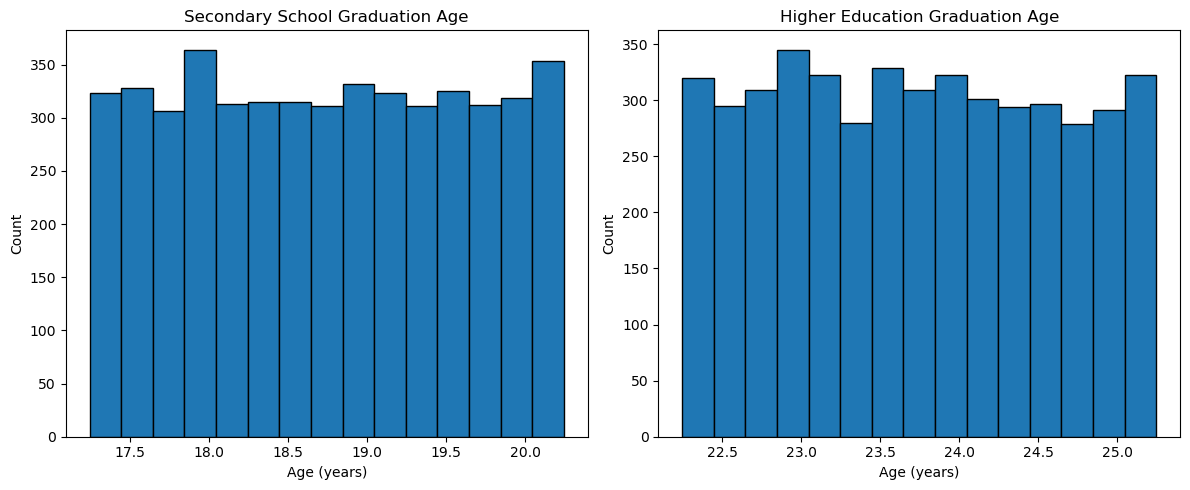

In [636]:
import matplotlib.pyplot as plt
from datetime import datetime
import json

import matplotlib.pyplot as plt
from datetime import datetime
import json

# Function to compute age at graduation in decimal years
def get_graduation_ages(person):
    birth_date = datetime.strptime(person['client_profile']['birth_date'], "%Y-%m-%d")
    sec_year = person['client_profile']['secondary_school']['graduation_year']
    sec_grad_date = datetime(sec_year, 6, 30)  # assume mid-year graduation
    sec_age = (sec_grad_date - birth_date).days / 365.25

    higher_ed = person['client_profile'].get('higher_education', [])
    if higher_ed:
        higher_year = higher_ed[0]['graduation_year']
        higher_grad_date = datetime(higher_year, 6, 30)
        higher_age = (higher_grad_date - birth_date).days / 365.25
    else:
        higher_age = None

    return sec_age, higher_age

# Sample usage:
# Load your data and false positives
# with open("data.json") as f:
#     data = json.load(f)
# with open("false_positives.json") as f:
#     false_positives = json.load(f)

# For demonstration, here’s how you would collect the ages:
secondary_ages = []
higher_ages = []

for idx in true_data:
    person = data[idx]
    sec_age, high_age = get_graduation_ages(person)
    secondary_ages.append(sec_age)
    higher_ages.append(high_age)





# Function to compute age at graduation in decimal years
def get_graduation_ages(person):
    birth_date = datetime.strptime(person['client_profile']['birth_date'], "%Y-%m-%d")
    sec_year = person['client_profile']['secondary_school']['graduation_year']
    sec_grad_date = datetime(sec_year, 6, 30)  # assume mid-year graduation
    sec_age = (sec_grad_date - birth_date).days / 365.25

    higher_ed = person['client_profile'].get('higher_education', [])
    if higher_ed:
        higher_year = higher_ed[0]['graduation_year']
        higher_grad_date = datetime(higher_year, 6, 30)
        higher_age = (higher_grad_date - birth_date).days / 365.25
    else:
        higher_age = None

    return sec_age, higher_age

# Sample usage:
# Load your data and false positives
# with open("data.json") as f:
#     data = json.load(f)
# with open("false_positives.json") as f:
#     false_positives = json.load(f)

# For demonstration, here’s how you would collect the ages:
secondary_ages = []
higher_ages = []

for idx in true_data:
    person = data[idx]
    sec_age, high_age = get_graduation_ages(person)
    secondary_ages.append(sec_age)
    if high_age is not None:
        higher_ages.append(high_age)

# Plotting histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(secondary_ages, bins=15, edgecolor='black')
plt.title("Secondary School Graduation Age")
plt.xlabel("Age (years)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(higher_ages, bins=15, edgecolor='black')
plt.title("Higher Education Graduation Age")
plt.xlabel("Age (years)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [615]:
secondary_ages = []
higher_ages = []

for i in true_data:
    person = data[idx]
    sec_age, high_age = get_graduation_ages(person)
    secondary_ages.append(sec_age)
    higher_ages.append(high_age)

In [645]:
from datetime import datetime

def get_graduation_ages(person):
    birth_date = datetime.strptime(person['client_profile']['birth_date'], "%Y-%m-%d")
    
    # Secondary school graduation age
    sec_year = person['client_profile']['secondary_school']['graduation_year']
    sec_grad_date = datetime(sec_year, 6, 30)
    sec_age = (sec_grad_date - birth_date).days / 365.25

    # Higher education graduation age (if exists)
    higher_ed = person['client_profile'].get('higher_education', [])
    if higher_ed:
        higher_year = higher_ed[0]['graduation_year']
        higher_grad_date = datetime(higher_year, 6, 30)
        higher_age = (higher_grad_date - birth_date).days / 365.25
    else:
        higher_age = None

    return sec_age, higher_age


def classify(person):
    sec_age, higher_age = get_graduation_ages(person)

    # Check graduation age constraints
    if not (16 <= sec_age <= 21):
        return "Reject"

    if higher_age is not None and not (21 <= higher_age <= 26):
        return "Reject"

    return "Accept"


In [647]:
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

def get_graduation_ages(person):
    try:
        birth_date = datetime.strptime(person['client_profile']['birth_date'], "%Y-%m-%d")
    except Exception:
        return None, None  # Invalid birthdate
    
    try:
        sec_year = person['client_profile']['secondary_school']['graduation_year']
        sec_grad_date = datetime(sec_year, 6, 30)
        sec_age = (sec_grad_date - birth_date).days / 365.25
    except Exception:
        sec_age = None

    higher_ed = person['client_profile'].get('higher_education', [])
    if higher_ed:
        try:
            higher_year = higher_ed[0]['graduation_year']
            higher_grad_date = datetime(higher_year, 6, 30)
            higher_age = (higher_grad_date - birth_date).days / 365.25
        except Exception:
            higher_age = None
    else:
        higher_age = None

    return sec_age, higher_age

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # MRZ passport number consistency
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # No multiple domiciles
    domicile = entry.get('client_profile', {}).get('country_of_domicile')
    if domicile and len(domicile.split(',')) > 1:
        all_consistent = False

    # Passport not expired as of 2025-04-01
    expiry_str = entry.get('passport', {}).get('passport_expiry_date')
    if expiry_str:
        try:
            expiry_date = datetime.strptime(expiry_str, "%Y-%m-%d")
            if expiry_date < datetime(2025, 4, 1):
                all_consistent = False
        except ValueError:
            all_consistent = False

    # 🎓 Graduation age check
    sec_age, high_age = get_graduation_ages(entry)
    if sec_age is None or not (16 <= sec_age <= 21):
        all_consistent = False
    if high_age is not None and not (21 <= high_age <= 26):
        all_consistent = False

    # Predict
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# 🧾 Evaluation
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.69      0.81      5150
      Accept       0.75      1.00      0.86      4850

    accuracy                           0.84     10000
   macro avg       0.87      0.84      0.84     10000
weighted avg       0.88      0.84      0.83     10000

🧮 Confusion Matrix:
[[3529 1621]
 [   0 4850]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 21, 31, 53, 62, 71, 79, 80, 86, 97, 102, 105, 106, 107, 109, 118, 122, 123, 129, 151, 152, 153, 160, 161, 164, 181, 182, 183, 192, 201, 207, 212, 217, 228, 245, 249, 257, 271, 272, 287, 288, 290, 293, 305, 306, 314, 322, 330, 332, 334, 348, 349, 350, 353, 354, 369, 370, 372, 373, 374, 380, 385, 391, 392, 406, 421, 424, 429, 431, 438, 447, 479, 513, 519, 521, 532, 534, 535, 541, 547, 548, 557, 559, 564, 572, 578, 580, 585, 589, 598, 600, 610, 634, 636, 640, 645, 646, 653, 655, 656, 667, 672, 673, 679, 683, 690,